# Meanshift 

### The Definition of Meanshift 
Falling under the category of a clustering algorithm, Meanshift is an unspervised learning algorithm that assigns the data points to the clusters iteratively by shifiting data points towards the mode (in the context of Meanshift, mode is the highest density of data points in the region). As such, meanshift algorithm is also known as the Mode-seeking algorithm. Unlike K-means, meanshift does not requre specifying the number of clusters in advance.

### Algorithm
1. Randomly choose a data point(initial centroid) from dataset and draw a circle (Bandwidth, Window)
2. Find all the data within the circle and calculate the new centroid
3. Update the centroid
4. Check and find all the data within the new circle and calculate the new centroid
5. Iterate step 2 ~ 4 until the centroid not move again
6. Randomly choose another data point from dataset
7. Repeat step 1 ~ 6 until all data in dataset are calculated


### Application
* Clustering
* Image smoothing 
* Object tracking (image)
* Segmentation
* Image contour detection

In [28]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image
from itertools import cycle
from matplotlib.pyplot import imshow
%matplotlib inline

number of estimated clusters : 3


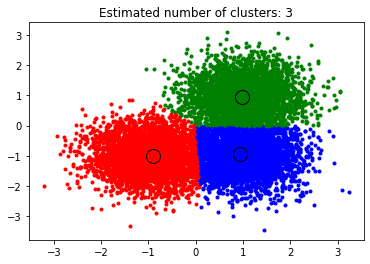

In [29]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

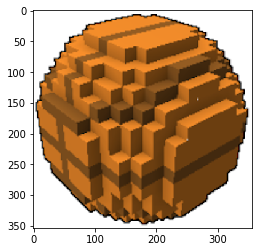

In [34]:
# import an 354*356 png picture
image = Image.open('./data/basketball.png').convert('RGB')
image = np.array(image)
imshow(image)
#print(image)
#print(image.shape)

In [35]:
# Flat RGB image to feature martix with shape 900*3
flat_image=np.reshape(image, [-1, 3])
# print(flat_image)

# Adjust bandwidth
# Default is flat kernel
bandwidth = estimate_bandwidth(flat_image, quantile=.265, n_samples=100)
ms = MeanShift(bandwidth, bin_seeding=True)

# ms = MeanShift()

ms.fit(flat_image)
labels=ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [36]:
# Convert result cluster to RGB point
cluster_RGB_map = []

for i in labels_unique:
    cluster_index = (labels == i)
    cluster_RGB_pionts = flat_image[cluster_index]
    each_cluster_RGB = np.mean(cluster_RGB_pionts, axis=0).astype(int)
    cluster_RGB_map.append(each_cluster_RGB)

cluster_RGB_map = np.array(cluster_RGB_map)


final_image = []
# Stack RGB by index
for i in labels:
    each_pixel = cluster_RGB_map[i]
    final_image.append(each_pixel)

final_image = np.array(final_image)
# print(final_image)


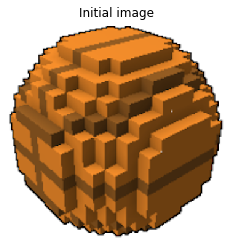

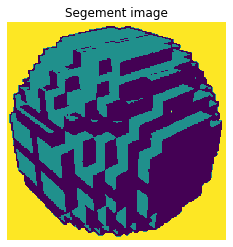

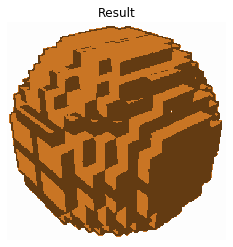

In [37]:
# Plot three images
# Initial unprocess image
plt.figure(0)
plt.title('Initial image')
plt.imshow(image)
plt.axis('off')
#plt.subplot(2, 1, 2)

# Segement image: plot by the cluster numeber
plt.figure(1)
after_segement = np.reshape(labels, [354, 356])
plt.title('Segement image')
plt.imshow(after_segement)
plt.axis('off')
plt.figure(2)

# Final image: plot by the mean of RGB in same cluster
final_image = np.reshape(final_image, [354, 356, 3])
# print(final_image)
plt.title('Result')
plt.axis('off')
plt.imshow(final_image)